## Data Download

## Imports and Setup

In [1]:
import idx2numpy # https://pypi.org/project/idx2numpy/
import numpy as np

np.random.seed(0)
np.set_printoptions(linewidth=200)

import matplotlib.pyplot as plt
%matplotlib notebook

from tqdm import tqdm

from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

from glob import glob

PATH = 'fashion-mnist/data/fashion/'
DICT = {
    0: 't-shirt',
    1: 'trouser',
    2: 'pullover',
    3: 'dress',
    4: 'coat',
    5: 'sandal',
    6: 'shirt',
    7: 'sneaker',
    8: 'bag',
    9: 'ankle boot'
}

## Data preparation

In [2]:
data = {}
for file, label in zip(sorted(glob(PATH+'*')),
                ['test_images', 'test_labels',
                 'train_images', 'train_labels']):
    data[label] = idx2numpy.convert_from_file(file)

## 1. Data exploration

In [3]:
for key, value in data.items():
    print(f'{key} shape: {value.shape}')

test_images shape: (10000, 28, 28)
test_labels shape: (10000,)
train_images shape: (60000, 28, 28)
train_labels shape: (60000,)


ankle boot


<IPython.core.display.Javascript object>


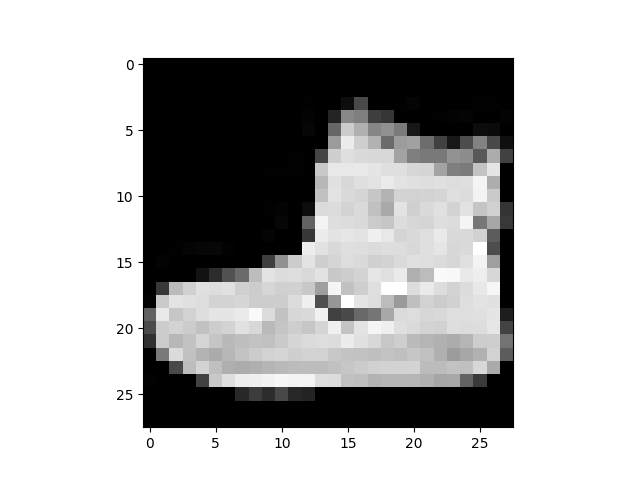

In [4]:
print(DICT[data['train_labels'][0]])
plt.imshow(data['train_images'][0], cmap='gray')
plt.show()

## 3. Data preprocessing

In [5]:
# define training and testing arrays
Xtr = data['train_images']
Ytr = data['train_labels']
Xte = data['test_images']
Yte = data['test_labels']


# preprocessing lambda functions
keys = np.random.permutation(len(Xtr))
shuffle = lambda X, keys: X[keys]
scale = lambda X: (X.astype(np.float32) - 127.5) / 127.5
flat = lambda X: X.reshape(X.shape[0], -1)


# preprocess arrays
# shuffle image dataset
Xtr = shuffle(Xtr, keys)
Ytr = shuffle(Ytr, keys)

# scale pixel values between -1 and 1
Xtr = scale(Xtr)
Xte = scale(Xte)

# flatten image arrays from 28 x 28 to 784 x 1
Xtr = flat(Xtr)
Xte = flat(Xte)

# make images zero-mean
Xtr -= np.mean(Xtr)
Xte -= np.mean(Xte)

t-shirt


<IPython.core.display.Javascript object>


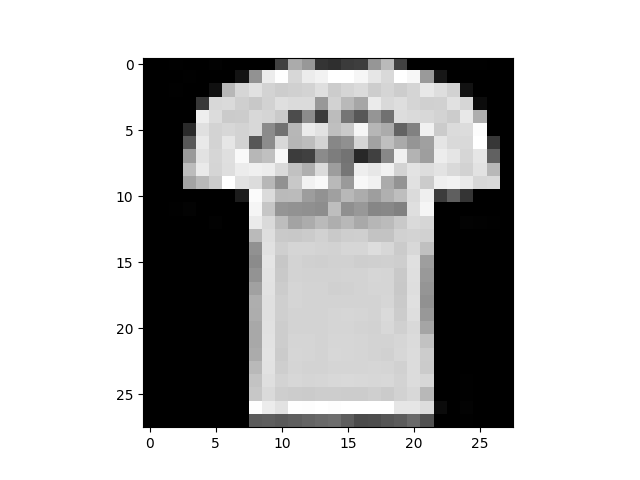

In [6]:
print(DICT[Ytr[0]])
plt.imshow((Xtr[0].reshape(28, 28)), cmap='gray')
plt.show()

## 2. Fully Connected Neural Network

In [7]:
print(f"""
We will use a fully connected neural network with {Xtr.shape[1]} input neurons and {len(DICT)} output neurons. Classification of an image dataset is a large-enough problem to warrant a neural network; however, we will experiment with different hidden layer sizes and numbers. 
""")


We will use a fully connected neural network with 784 input neurons and 10 output neurons. Classification of an image dataset is a large-enough problem to warrant a neural network; however, we will experiment with different hidden layer sizes and numbers. 



In [8]:
from nn import *

Try different activation too (relu and sigmoid)
and optimizers (sgd and adam)

In [9]:
nodes  = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1028]
layers = [1, 2, 3, 4]

losses = []

with tqdm(total=len(layers) * len(nodes)) as pbar:
    for layer in layers:
        for node in nodes:
            # initialize model
            model = Model()

            # add layers
            model.add(Layer_Dense(Xtr.shape[1], node))
            model.add(Activation_ReLU())
            for _ in range(layer):
                model.add(Layer_Dense(node, node))
                model.add(Activation_ReLU())
            model.add(Layer_Dense(node, 10))
            model.add(Activation_Softmax())

            # set model parameters
            model.set(
                loss=Loss_CategoricalCrossentropy(),
                optimizer=Optimizer_Adam(decay=1e-3),
                accuracy=Accuracy_Categorical()
            )

            # finalize model
            model.finalize()

            # train model
            model.train(Xtr, Ytr, validation_data=(Xte, Yte),
                        epochs=2, batch_size=128, p=False) # increase to 10 epochs before submission

            losses.append((layer, node, model.evaluate(Xte, Yte)))
            pbar.update(1)

100%|██████████| 40/40 [10:43<00:00, 16.09s/it]


## 4. Performance validation

<IPython.core.display.Javascript object>


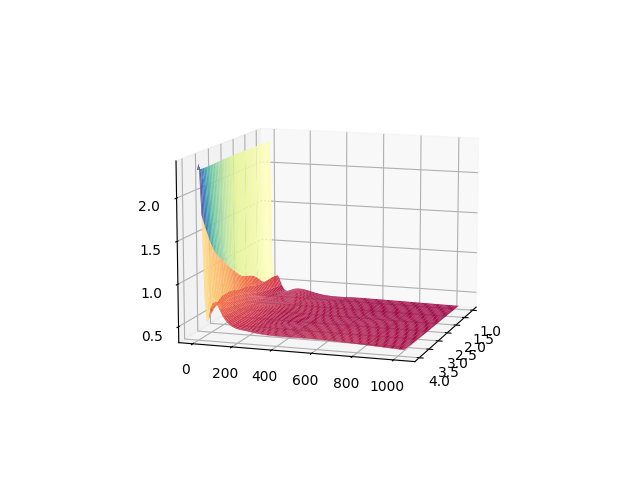

In [10]:
x, y, z = zip(*losses)
z = list(map(float, z))
grid_x, grid_y = np.mgrid[min(x):max(x):100j, min(y):max(y):100j]
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(grid_x, grid_y, grid_z, cmap=plt.cm.Spectral)
plt.show()

In [11]:
# 1 layer larger than the input image works well
losses

[(1, 2, 2.3025890504340043),
 (1, 4, 0.7811840480985071),
 (1, 8, 0.6867490386102081),
 (1, 16, 0.5687188632323769),
 (1, 32, 0.5470348879684389),
 (1, 64, 0.4654235935231654),
 (1, 128, 0.42004122943877836),
 (1, 256, 0.3893504661853726),
 (1, 512, 0.3674271741974686),
 (1, 1028, 0.35391638755474897),
 (2, 2, 2.302589050435157),
 (2, 4, 1.097267634132705),
 (2, 8, 0.7464368013364477),
 (2, 16, 0.8698089287200234),
 (2, 32, 0.6617170548790707),
 (2, 64, 0.5462792246079056),
 (2, 128, 0.46177209205584213),
 (2, 256, 0.4329443012603043),
 (2, 512, 0.380364654388258),
 (2, 1028, 0.360989130780632),
 (3, 2, 2.302589050435157),
 (3, 4, 1.2326073561877595),
 (3, 8, 1.0612598845773042),
 (3, 16, 1.1844427314223802),
 (3, 32, 0.8519689792142892),
 (3, 64, 0.6735029559280113),
 (3, 128, 0.5692083330541061),
 (3, 256, 0.4338921481259321),
 (3, 512, 0.4001686118478268),
 (3, 1028, 0.3702498025268726),
 (4, 2, 2.302589050435157),
 (4, 4, 2.3025890523697305),
 (4, 8, 2.302589053601144),
 (4, 16, 2.

In [9]:
# initialize model
model = Model()

# add layers
model.add(Layer_Dense(Xtr.shape[1], 1024))
model.add(Activation_ReLU())
model.add(Layer_Dense(1024, 256))
model.add(Activation_ReLU())
model.add(Layer_Dense(256, 64))
model.add(Activation_ReLU())
model.add(Layer_Dense(64, 10))
model.add(Activation_Softmax())

# set model parameters
model.set(
    loss=Loss_CategoricalCrossentropy(),
    optimizer=Optimizer_Adam(decay=1e-3),
    accuracy=Accuracy_Categorical()
)

# finalize model
model.finalize()

# train model
model.train(Xtr, Ytr, validation_data=(Xte, Yte),
            epochs=10, batch_size=128, print_every=200)

epoch: 1
step: 0, acc: 0.086, loss: 2.303 (data_loss: 2.303, reg_loss: 0.000), lr: 0.001
step: 200, acc: 0.805, loss: 0.559 (data_loss: 0.559, reg_loss: 0.000), lr: 0.0008333333333333334
step: 400, acc: 0.828, loss: 0.426 (data_loss: 0.426, reg_loss: 0.000), lr: 0.0007142857142857143
step: 468, acc: 0.854, loss: 0.381 (data_loss: 0.381, reg_loss: 0.000), lr: 0.000681198910081744
training, acc: 0.765, loss: 0.625 (data_loss: 0.625, reg_loss: 0.000), lr: 0.000681198910081744
validation, acc: 0.835, loss: 0.465
epoch: 2
step: 0, acc: 0.859, loss: 0.406 (data_loss: 0.406, reg_loss: 0.000), lr: 0.0006807351940095304
step: 200, acc: 0.828, loss: 0.439 (data_loss: 0.439, reg_loss: 0.000), lr: 0.0005991611743559018
step: 400, acc: 0.875, loss: 0.314 (data_loss: 0.314, reg_loss: 0.000), lr: 0.0005350454788657037
step: 468, acc: 0.885, loss: 0.325 (data_loss: 0.325, reg_loss: 0.000), lr: 0.0005162622612287042
training, acc: 0.854, loss: 0.397 (data_loss: 0.397, reg_loss: 0.000), lr: 0.0005162622

<IPython.core.display.Javascript object>


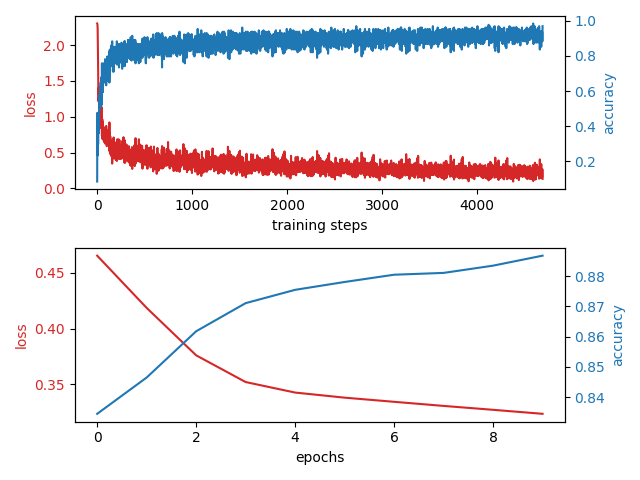

In [11]:
model.plot()